<a href="https://colab.research.google.com/github/Omar-Atwa16/Netflix-IMDB/blob/main/Python%20Codes/Python%20codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Seperating the decades
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Netflix IMDB Data/imdb_V2.csv", engine='python', on_bad_lines='skip')

era = {
    "50s": (1950, 1959),
    "60s": (1960, 1969),
    "70s": (1970, 1979),
    "80s": (1980, 1989),
    "90s": (1990, 1999),
    "00s": (2000, 2009),
    "10s": (2010, 2019),
    "20s": (2020, 2029)
}

pathh = "/content/sample_data/"

for label, (start, end) in era.items():
    eraDF = df[(df['release_year'] >= start) & (df['release_year'] <= end)]
    filename = pathh + f"Netflix_{label}.csv"
    eraDF.to_csv(filename, index = False)
    print(f"Saved: Netflix_{label}.csv")

Saved: Netflix_50s.csv
Saved: Netflix_60s.csv
Saved: Netflix_70s.csv
Saved: Netflix_80s.csv
Saved: Netflix_90s.csv
Saved: Netflix_00s.csv
Saved: Netflix_10s.csv
Saved: Netflix_20s.csv


In [10]:
# Adding era column
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Netflix IMDB Data/imdb_V2.csv", engine='python', on_bad_lines='skip')

def get_decade(year):
    decade = int(year) // 10 * 10
    return f"{decade}s"

df['era'] = df['release_year'].apply(get_decade)

df.to_csv("/content/drive/MyDrive/Netflix IMDB Data/imdb_V3.csv", index=False)
print("Saved: imdb_V3.csv")

Saved: imdb_V3.csv


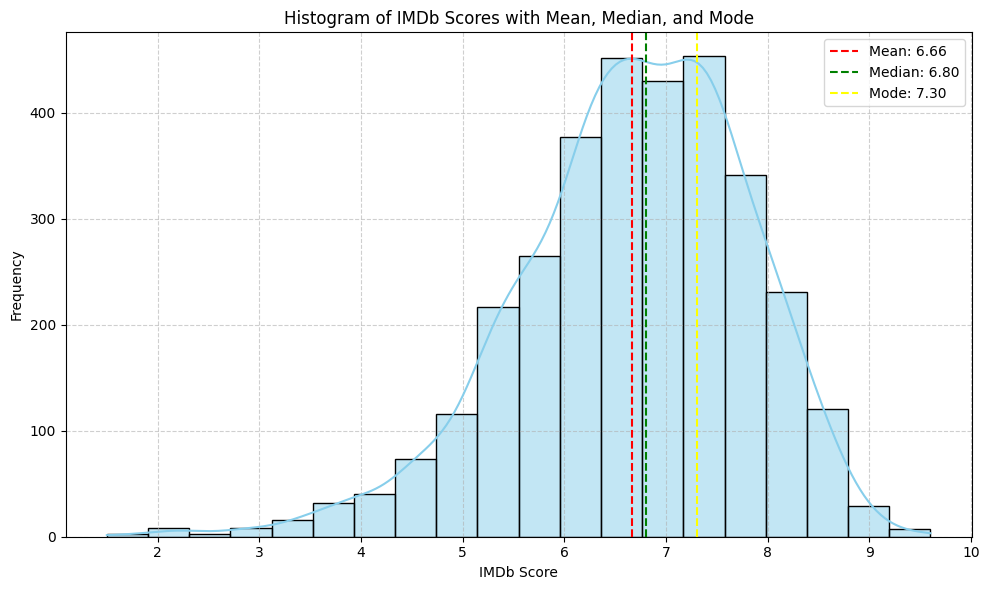

Skewness: -0.6412433448992643


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

df = pd.read_csv("/content/drive/MyDrive/Netflix IMDB Data/imdb_V3.csv", engine='python', on_bad_lines='skip')


mean_score = df['imdb_score'].mean()
median_score = df['imdb_score'].median()
mode_score = df['imdb_score'].mode()[0]  # FIXED: Call .mode() and get first value

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='skyblue')

plt.axvline(mean_score, color='red', linestyle='--', label=f"Mean: {mean_score:.2f}")
plt.axvline(median_score, color='green', linestyle='--', label=f"Median: {median_score:.2f}")
plt.axvline(mode_score, color='yellow', linestyle='--', label=f"Mode: {mode_score:.2f}")

plt.title('Histogram of IMDb Scores with Mean, Median, and Mode')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Skewness
print("Skewness:", df['imdb_score'].skew())
